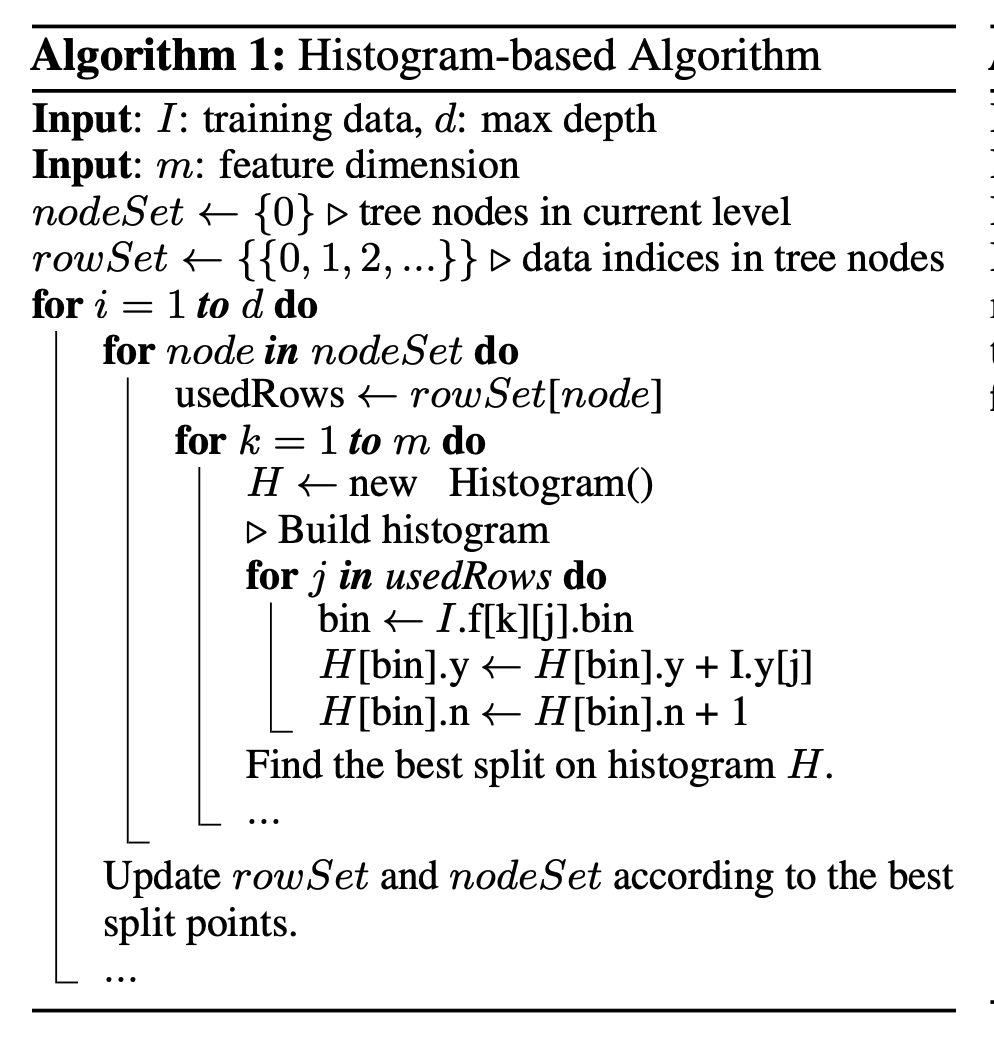




In [1]:
from typing import List, Optional
import pandas as pd
import numpy as np


class TreeNode:
  def __init__(self, depth=0):
    self.depth = depth
    self.left: Optional['TreeNode'] = None
    self.right: Optional['TreeNode'] = None

    self.feature_index: Optional[int] = None
    self.threshold_bin: Optional[int] = None

    self.value: Optional[float] = None

def build_histogram(feature_column, gradients, hessians, n_bins):
  grad_hist = np.zeros(n_bins)
  hess_hist = np.zeros(n_bins)

  for i in range(len(feature_column)):
    bin_id = feature_column[i]
    grad_hist[bin_id] += gradients[i]
    hess_hist[bin_id] += hessians[i]

  return grad_hist, hess_hist

def find_best_split(grad_hist, hess_hist, lambda_reg=1.0):
  total_grad = grad_hist.sum()
  total_hess = hess_hist.sum()

  best_gain = -np.inf
  best_bin = None

  left_grad = 0.0
  left_hess = 0.0

  for b in range(len(grad_hist) - 1):
    left_grad += grad_hist[b]
    left_hess += hess_hist[b]

    right_grad = total_grad - left_grad
    right_hess = total_hess - left_hess

    gain = (
        (left_grad**2) / (left_hess + lambda_reg) +
        (right_grad ** 2) / (right_hess + lambda_reg) -
        (total_grad ** 2) / (total_hess + lambda_reg)
    )

    if gain > best_gain:
      best_gain = gain
      best_bin = b

  return best_gain, best_bin



Best gain: 4.1714
Best bin index: 3


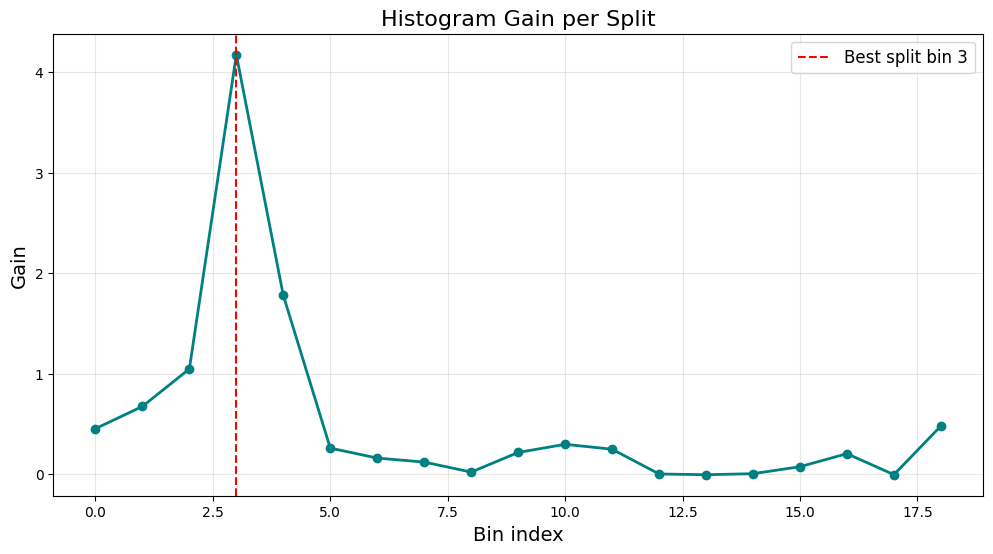

In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
n_samples = 200
n_bins = 20

X_raw = np.random.uniform(0, 100, n_samples)

gradients = np.random.normal(0, 1, n_samples)
hessians = np.random.uniform(0.5, 1.5, n_samples)

bin_edges = np.linspace(X_raw.min(), X_raw.max(), n_bins+1)
X_binned = np.digitize(X_raw, bins=bin_edges[1:-1])  # индексы bin_id

grad_hist, hess_hist = build_histogram(X_binned, gradients, hessians, n_bins)
best_gain, best_bin = find_best_split(grad_hist, hess_hist)

print(f"Best gain: {best_gain:.4f}")
print(f"Best bin index: {best_bin}")

total_grad = grad_hist.sum()
total_hess = hess_hist.sum()
left_grad = 0.0
left_hess = 0.0
gains = []

for b in range(len(grad_hist) - 1):
    left_grad += grad_hist[b]
    left_hess += hess_hist[b]
    right_grad = total_grad - left_grad
    right_hess = total_hess - left_hess
    gain = (left_grad**2)/(left_hess+1.0) + (right_grad**2)/(right_hess+1.0) - (total_grad**2)/(total_hess+1.0)
    gains.append(gain)

plt.figure(figsize=(12,6))
plt.plot(range(len(gains)), gains, marker='o', linestyle='-', color='teal', linewidth=2, markersize=6)
plt.axvline(best_bin, color='red', linestyle='--', label=f'Best split bin {best_bin}')
plt.title("Histogram Gain per Split", fontsize=16)
plt.xlabel("Bin index", fontsize=14)
plt.ylabel("Gain", fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.show()
